# Classification on the [Pima Indians Diabetes](https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv) dataset using SVM with Python's Scikit-Learn
by [Zahra Taheri](https://github.com/zahta) (3 July 2020)

### Import libraries

In [1]:
#For some basic operations
import numpy as np
import pandas as pd

#For visualizations
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rc('axes', labelsize=10)
mpl.rc('xtick', labelsize=10)
mpl.rc('ytick', labelsize=10)
import seaborn as sns

import dabl

# to make this notebook's output identical at every run
np.random.seed(42)

import warnings
warnings.filterwarnings('ignore')

## Reading the dataset

In [2]:
data=pd.read_csv('diabetes.csv')
data.shape

(768, 9)

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Descriptive statistics and data visualizations

In [5]:
#Describe the dataset

data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
#Check the no. of unique items in each categorical column

data.select_dtypes('object').nunique()

Series([], dtype: float64)

In [7]:
# Percentage of missing data in each column

number_of_columns = data.shape[0]
percentage_of_missing_data = data.isnull().sum()/number_of_columns
print(percentage_of_missing_data)

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64


### Correlations

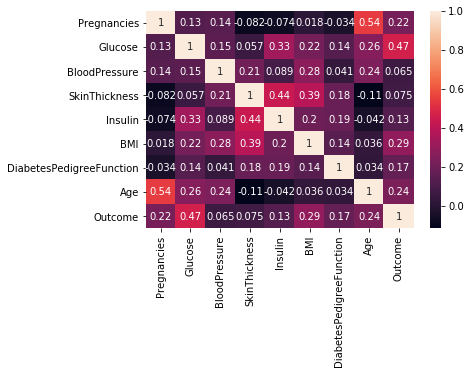

In [8]:
sns.heatmap(data.corr(), annot = True)

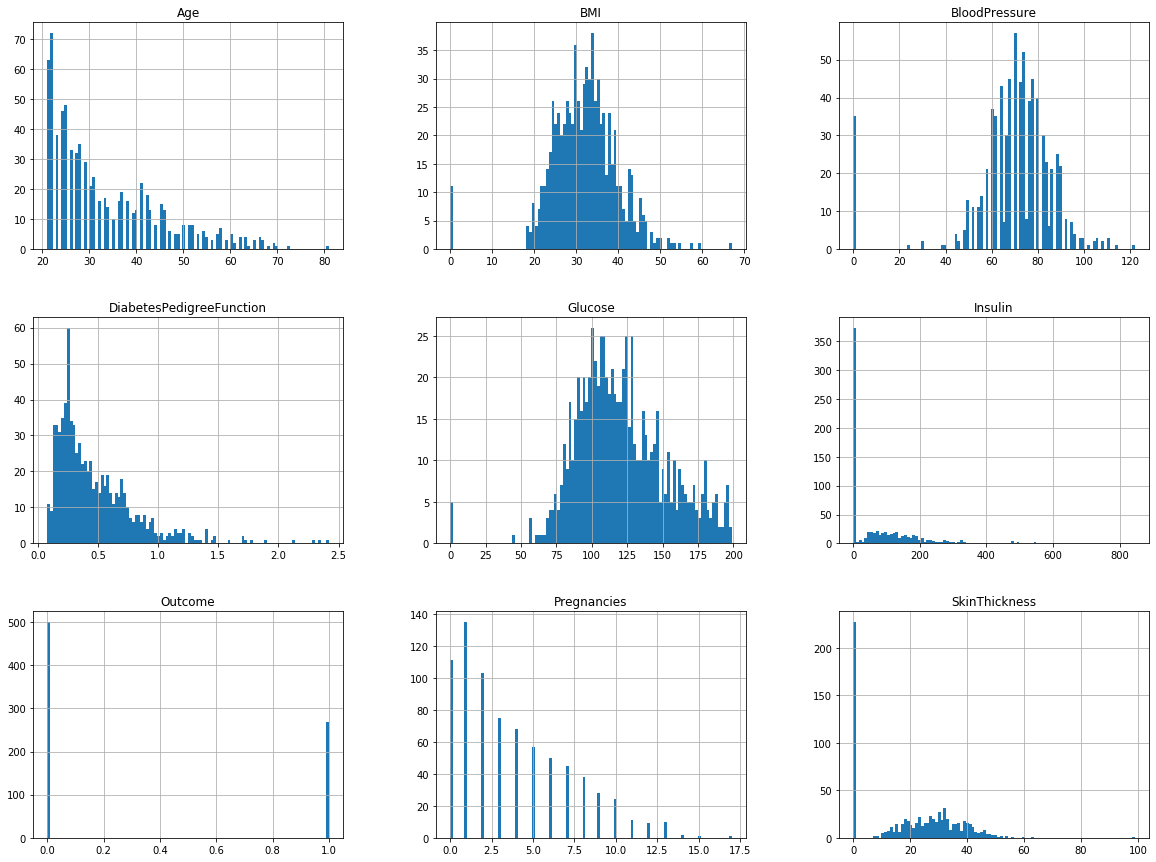

In [9]:
data.hist(bins=100, figsize=(20,15))

plt.show()

Target looks like classification
Linear Discriminant Analysis training set score: 0.737


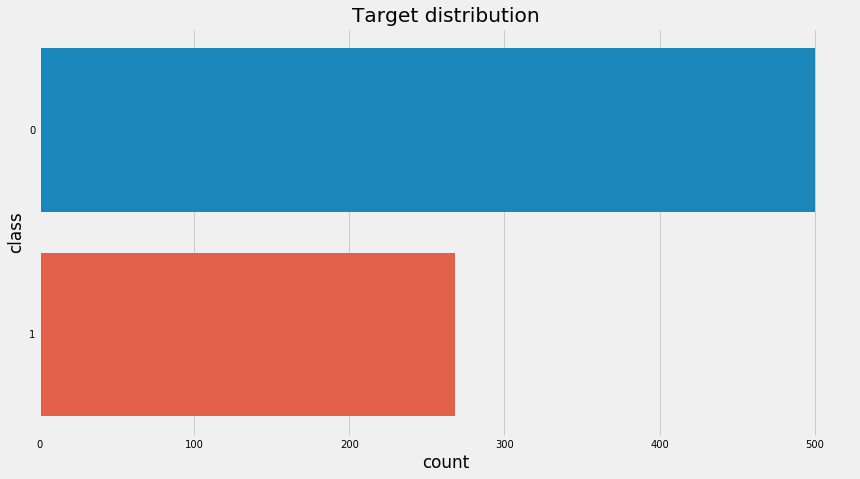

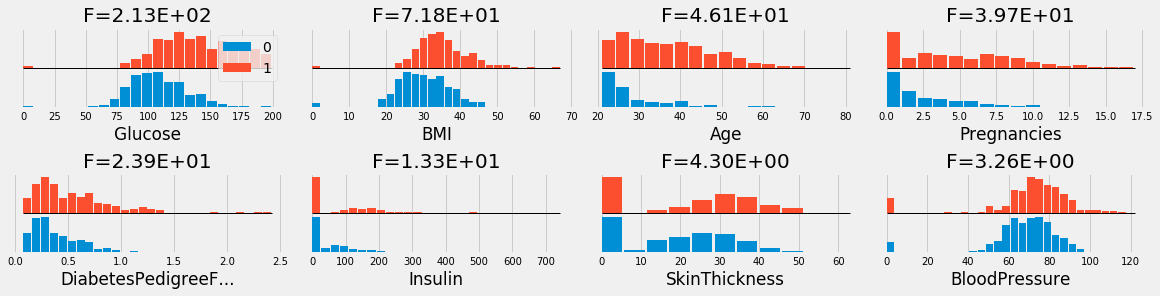

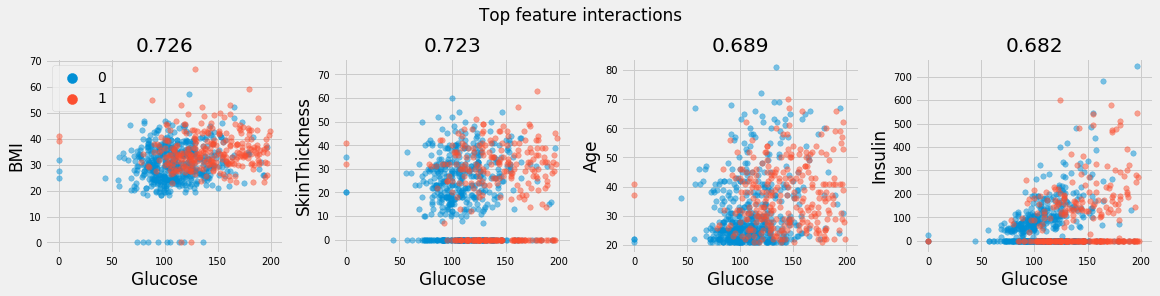

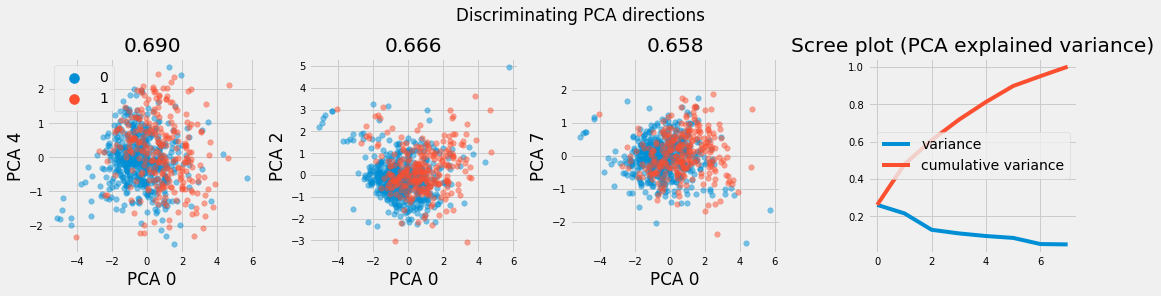

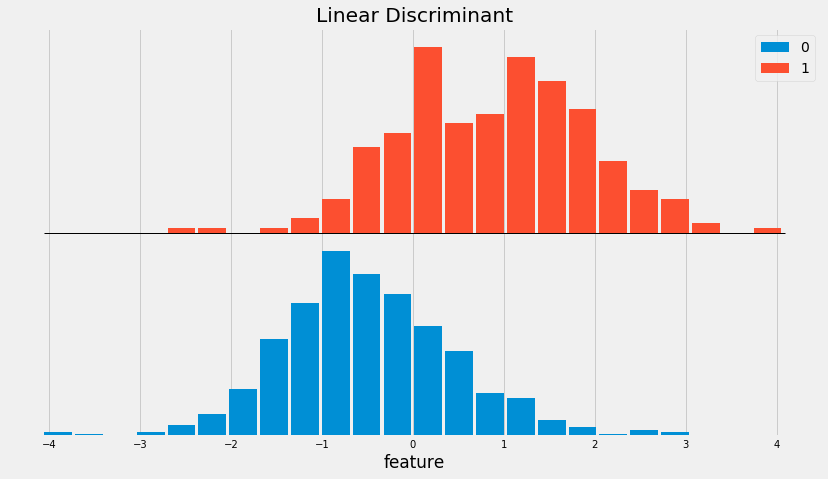

In [10]:
plt.rcParams['figure.figsize'] = (13,7)
plt.style.use('fivethirtyeight')
dabl.plot(data, target_col = 'Outcome')

In [11]:
X=data.iloc[:,:8].values
y=data.iloc[:,8].values
print(data.shape)
print(X.shape)
print(y.shape)

(768, 9)
(768, 8)
(768,)


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [13]:
from sklearn.preprocessing import StandardScaler

std_scale =StandardScaler()

X_train=std_scale.fit_transform(X_train)
X_test=std_scale.fit_transform(X_test)

In [14]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [15]:
SVM = SVC(C=1, kernel="linear", random_state=42)

SVM.fit(X_train, y_train)
y_pred= SVM.predict(X_test)

print('Accuracy= ' + str(accuracy_score(y_test, y_pred)))

Accuracy= 0.8116883116883117


In [16]:
SVM = SVC(C=1, kernel="poly", random_state=42)

SVM.fit(X_train, y_train)
y_pred= SVM.predict(X_test)

print('Accuracy= ' + str(accuracy_score(y_test, y_pred)))

Accuracy= 0.7597402597402597


In [17]:
SVM = SVC(C=1, kernel="rbf", random_state=42)

SVM.fit(X_train, y_train)
y_pred= SVM.predict(X_test)

print('Accuracy= ' + str(accuracy_score(y_test, y_pred)))

Accuracy= 0.8051948051948052


In [18]:
SVM = SVC(C=0.99, kernel="linear", random_state=42)

SVM.fit(X_train, y_train)
y_pred= SVM.predict(X_test)

print('Accuracy= ' + str(accuracy_score(y_test, y_pred)))

Accuracy= 0.8116883116883117


In [19]:
SVM = SVC(C=0.99, kernel="poly", random_state=42)

SVM.fit(X_train, y_train)
y_pred= SVM.predict(X_test)

print('Accuracy= ' + str(accuracy_score(y_test, y_pred)))

Accuracy= 0.7597402597402597


In [20]:
SVM = SVC(C=0.99, kernel="rbf", random_state=42)

SVM.fit(X_train, y_train)
y_pred= SVM.predict(X_test)

print('Accuracy= ' + str(accuracy_score(y_test, y_pred)))

Accuracy= 0.8051948051948052


In [21]:
SVM = SVC(C=0.1, kernel="linear", random_state=42)

SVM.fit(X_train, y_train)
y_pred= SVM.predict(X_test)

print('Accuracy= ' + str(accuracy_score(y_test, y_pred)))

Accuracy= 0.8116883116883117


In [22]:
SVM = SVC(C=0.1, kernel="poly", random_state=42)

SVM.fit(X_train, y_train)
y_pred= SVM.predict(X_test)

print('Accuracy= ' + str(accuracy_score(y_test, y_pred)))

Accuracy= 0.7597402597402597


In [23]:
SVM = SVC(C=0.1, kernel="rbf", random_state=42)

SVM.fit(X_train, y_train)
y_pred= SVM.predict(X_test)

print('Accuracy= ' + str(accuracy_score(y_test, y_pred)))

Accuracy= 0.7792207792207793


In [24]:
SVM = SVC(C=10, kernel="linear", random_state=42)

SVM.fit(X_train, y_train)
y_pred= SVM.predict(X_test)

print('Accuracy= ' + str(accuracy_score(y_test, y_pred)))

Accuracy= 0.8116883116883117


In [25]:
SVM = SVC(C=10, kernel="poly", random_state=42)

SVM.fit(X_train, y_train)
y_pred= SVM.predict(X_test)

print('Accuracy= ' + str(accuracy_score(y_test, y_pred)))

Accuracy= 0.7402597402597403


In [26]:
SVM = SVC(C=10, kernel="rbf", random_state=42)

SVM.fit(X_train, y_train)
y_pred= SVM.predict(X_test)

print('Accuracy= ' + str(accuracy_score(y_test, y_pred)))

Accuracy= 0.7727272727272727
